In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 16:46:59,821] A new study created in memory with name: no-name-d712462d-6e1b-44a6-a156-06872a5ab0d6


[I 2025-04-27 16:48:38,576] Trial 0 finished with value: 0.9724124809741248 and parameters: {'n_estimators': 8382, 'max_depth': 10, 'learning_rate': 0.0013184342373618945, 'subsample': 0.872139614010457, 'colsample_bytree': 0.5786830782543393, 'gamma': 0.3589554898539832, 'reg_alpha': 0.28012352573252586, 'reg_lambda': 0.24281317326583335}. Best is trial 0 with value: 0.9724124809741248.
[I 2025-04-27 16:49:18,980] Trial 1 finished with value: 0.9585616438356164 and parameters: {'n_estimators': 7563, 'max_depth': 4, 'learning_rate': 0.0065744468593196236, 'subsample': 0.6606679894686045, 'colsample_bytree': 0.6789531375180917, 'gamma': 3.7436374720361747, 'reg_alpha': 2.645069358788868e-08, 'reg_lambda': 6.386178202458661e-08}. Best is trial 0 with value: 0.9724124809741248.
[I 2025-04-27 16:49:23,362] Trial 2 finished with value: 0.9530060882800608 and parameters: {'n_estimators': 783, 'max_depth': 14, 'learning_rate': 0.09858466846655967, 'subsample': 0.8388910493844602, 'colsample_b

Best trial:
Accuracy: 0.9752283105022832
Best hyperparameters:  {'n_estimators': 6631, 'max_depth': 3, 'learning_rate': 0.0010032598505964685, 'subsample': 0.5731887354034896, 'colsample_bytree': 0.7114269128105245, 'gamma': 1.2644603644262231, 'reg_alpha': 0.00013977862806202826, 'reg_lambda': 0.06223969477379219}


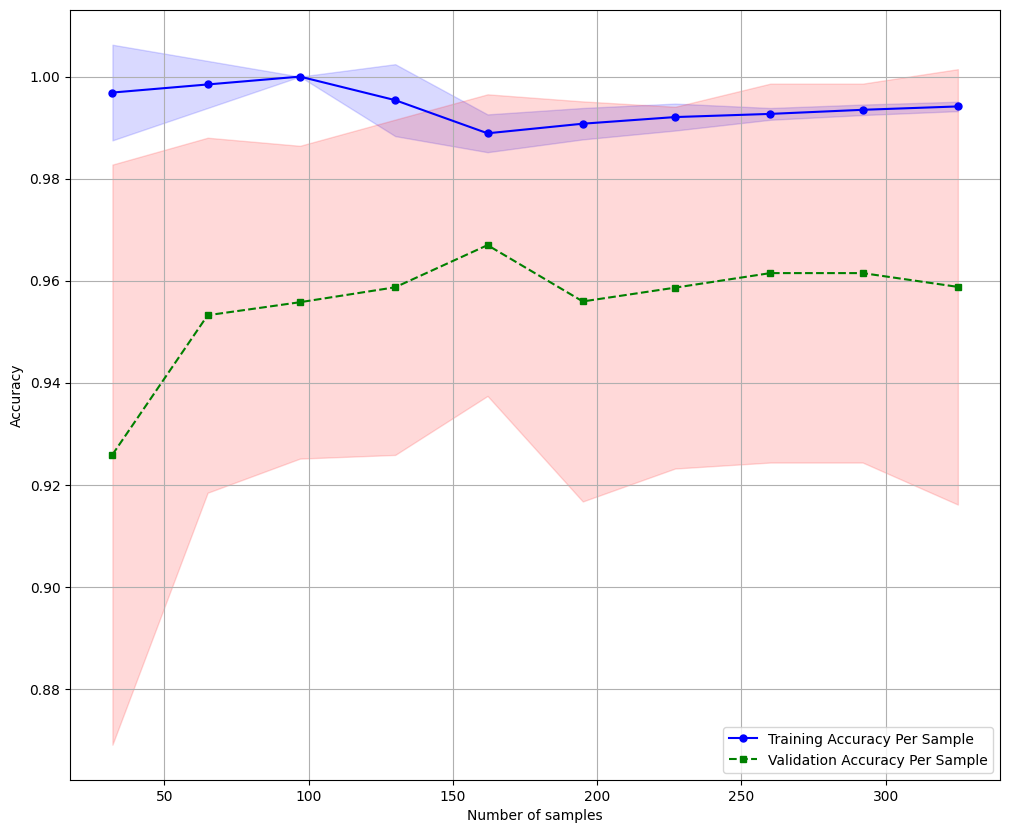

Confusion Matrix
[[ 56   8]
 [  0 107]]
Accuracy: 0.9532, Precision: 0.9304, Recall: 1.0000, F1: 0.9640, AUC: 0.9950


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', outlier_params)

helper.train_and_evaluate_model('xgb', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)